# Algorithm 1 - Linear Regression

In [4]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the dataset

forest_data = pd.read_csv("Sidi-Bel Abbes Region Dataset.csv")

In [6]:
forest_data.head()

,day,month,year,Temperature,Relative_Humidity,Wind_Speed,Rain,Fine_Fuel_Moisture_Code,Druff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Output
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [7]:
forest_data.shape

(122, 14)

In [8]:
# converting the dataset intoa a dataframe

forest_df = pd.DataFrame(forest_data)

In [9]:
# dropping the collumn named year since all the data have the same year in it 

forest_df = forest_df.drop(['year'], axis=1)

In [10]:
forest_df.shape

(122, 13)

In [11]:
forest_df.head()

,day,month,Temperature,Relative_Humidity,Wind_Speed,Rain,Fine_Fuel_Moisture_Code,Druff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Output
0,1,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,5,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [12]:
# Assigning X and Y for the model
# X is the input parameters for the model
# Y is the output that is required from the model

X = np.asarray(forest_df[['month', 'Temperature', 'Relative_Humidity', 'Wind_Speed', 'Fine_Fuel_Moisture_Code', 'Druff_Moisture_Code', 'Drought_Code', 'Initial_Spread_Index', 'Buildup_Index', 'Fire_Weather_Index']])
Y = np.asarray(forest_df['Output'])

In [13]:
# Adding training and testing variables from the dataset
# Splitting the dataset into 80% train and 20% testing data in a random manner

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

In [14]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin.fit(X_train, y_train)
print('Score:', lin.score(X_train, y_train))

Score: 0.7104074120287913


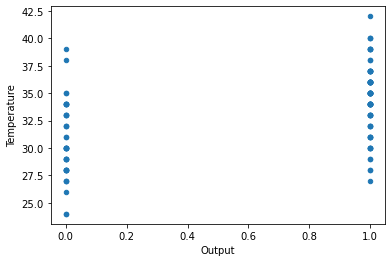

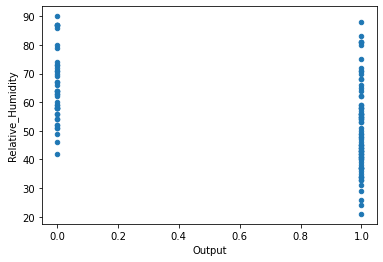

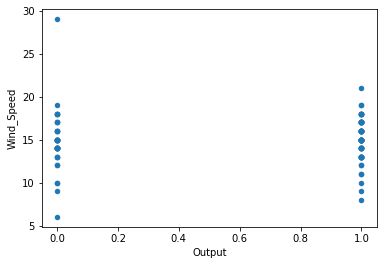

In [15]:
# Plotting Output vs Temperature
forest_df.plot(x='Output', y='Temperature', kind='scatter')

# Plotting Output vs Relative HUmidity
forest_df.plot(x='Output', y='Relative_Humidity', kind='scatter')

# Plotting Output vs Wind Speed
forest_df.plot(x='Output', y='Wind_Speed', kind='scatter')

plt.show()

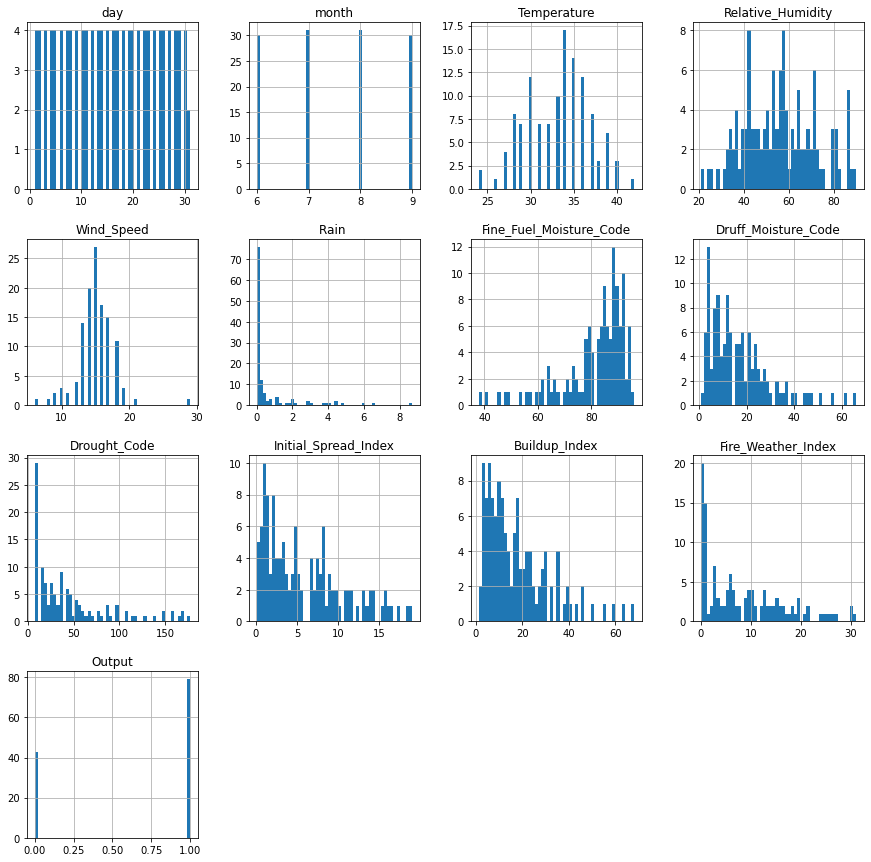

In [16]:
forest_df.hist(bins=50, figsize=(15,15))
plt.show()

# Algorithm 2 - Decision Trees


In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [18]:
forest_data = pd.read_csv("Sidi-Bel Abbes Region Dataset.csv")

In [19]:
forest_data.shape

(122, 14)

In [20]:
forest_data = forest_data.drop(['year'], axis=1)

In [21]:
X = np.asarray(forest_data[['month', 'Temperature', 'Relative_Humidity', 'Wind_Speed', 'Fine_Fuel_Moisture_Code', 'Druff_Moisture_Code', 'Drought_Code', 'Initial_Spread_Index', 'Buildup_Index', 'Fire_Weather_Index']])
Y = np.asarray(forest_data['Output'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [22]:
gini_classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=None, min_samples_leaf=5)
gini_classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=100)

In [23]:
entropy_classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
entropy_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [24]:
y_pred = gini_classifier.predict(X_test)

print("Predicted Values using Gini: ")
print(y_pred)
print()

print("Results using Gini")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
print("Report : ", classification_report(y_test, y_pred))

Predicted Values using Gini: 
[1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1]

Results using Gini
Confusion Matrix:  [[ 9  0]
 [ 0 28]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        28

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



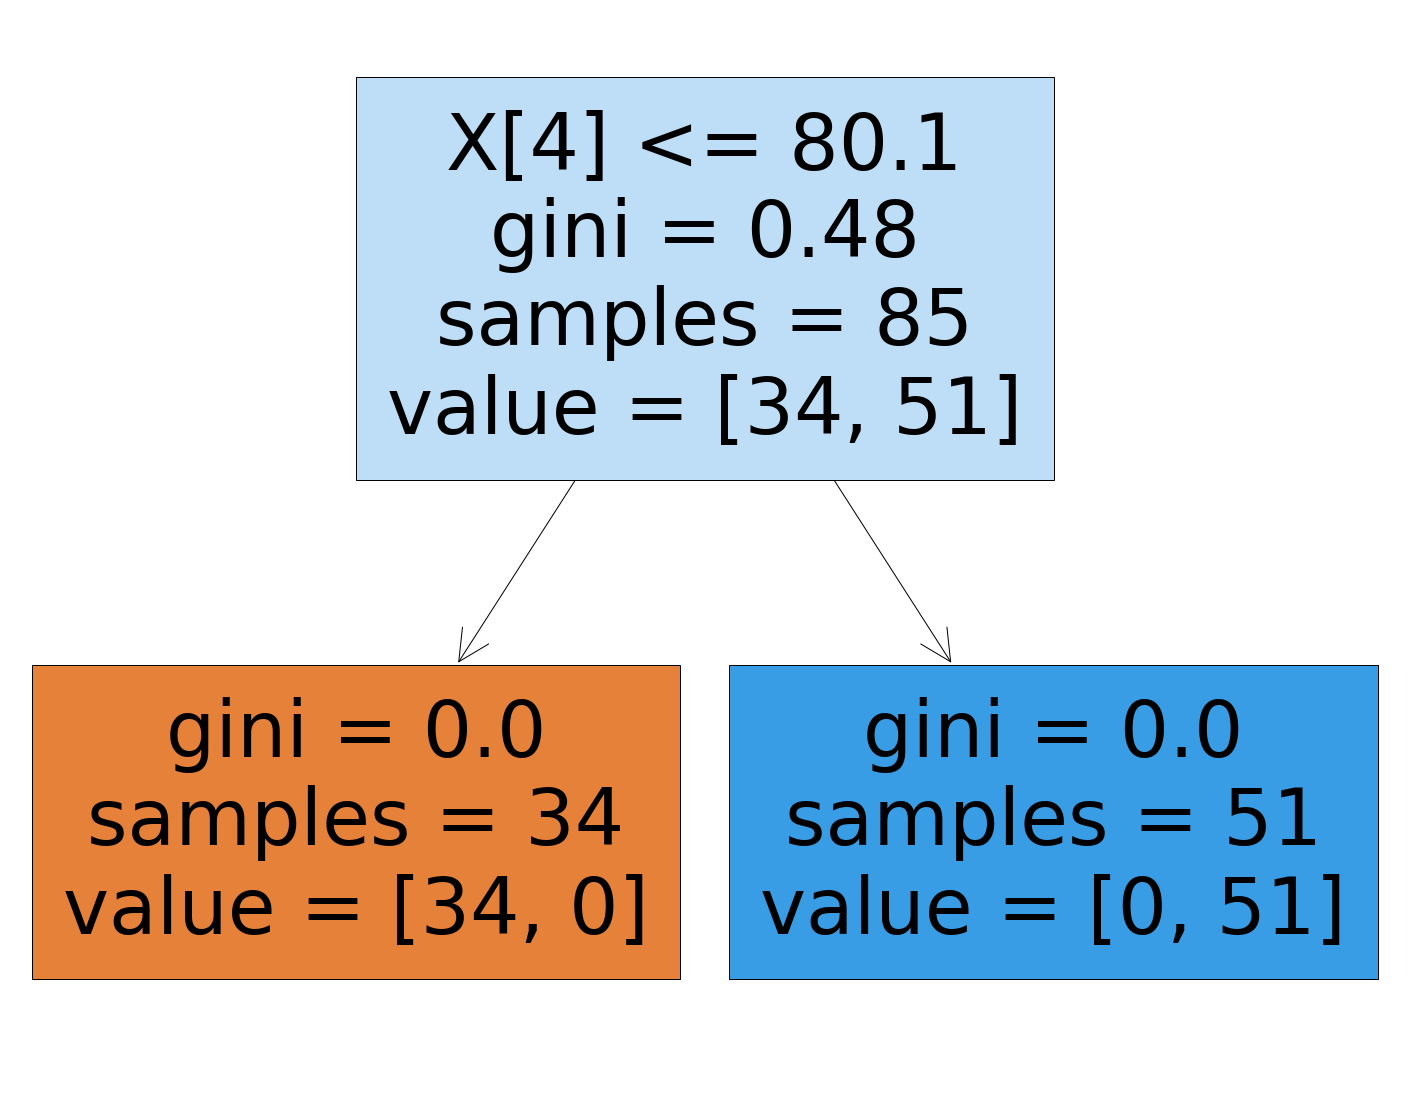

In [25]:
fig = plt.figure(figsize=(25,20))
t = tree.plot_tree(gini_classifier, filled = True)

In [26]:
y_pred1 = entropy_classifier.predict(X_test)

print("Predicted Values using entropy: ")
print(y_pred1)
print()
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred1))
print ("Accuracy : ", accuracy_score(y_test,y_pred1)*100) 
print("Report : ", classification_report(y_test, y_pred1))

Predicted Values using entropy: 
[1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1]

Confusion Matrix:  [[ 9  0]
 [ 0 28]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        28

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



# Algorithm 3 - Random Forests

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [28]:
forest_data = pd.read_csv("Sidi-Bel Abbes Region Dataset.csv")

In [29]:
forest_data = forest_data.drop(['year'], axis=1)

In [30]:
forest_df = pd.DataFrame(forest_data)

In [31]:
X = np.asarray(forest_data[['month', 'Temperature', 'Relative_Humidity', 'Wind_Speed', 'Fine_Fuel_Moisture_Code', 'Druff_Moisture_Code', 'Drought_Code', 'Initial_Spread_Index', 'Buildup_Index', 'Fire_Weather_Index']])
Y = np.asarray(forest_data['Output'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [33]:
forest_df.head()

,day,month,Temperature,Relative_Humidity,Wind_Speed,Rain,Fine_Fuel_Moisture_Code,Druff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Output
0,1,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,5,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [34]:
# creating a RF classifier
random_classifier = RandomForestClassifier(n_estimators = 100)

In [35]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
random_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred = random_classifier.predict(X_test)

In [37]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  1.0
